In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Covid.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


Exploratory Data Analysis

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58800 entries, 0 to 58799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58800 non-null  object 
 1   Country_code       58555 non-null  object 
 2   Country            58800 non-null  object 
 3   WHO_region         54390 non-null  object 
 4   New_cases          39361 non-null  float64
 5   Cumulative_cases   58800 non-null  int64  
 6   New_deaths         25108 non-null  float64
 7   Cumulative_deaths  58800 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.6+ MB
None


In [3]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

In [6]:
print(df['New_cases'].isna().sum(), df['New_deaths'].isna().sum(), df['Cumulative_deaths'].isna().sum())

0 0 0


In [5]:
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)
df['Cumulative_deaths'] = df['Cumulative_deaths'].fillna(0)

In [7]:
df['New_cases']=df['New_cases'].astype('int')
df['New_deaths']=df['New_deaths'].astype('int')
df['Cumulative_deaths']=df['Cumulative_deaths'].astype('int')

Total Cases and Deaths WorldWide

In [8]:
Total_cases = df['New_cases'].sum()
Total_deaths = df['New_deaths'].sum()
print(Total_cases,Total_deaths)

776205140 7064380


Daily Reported Cases WorlWide

In [10]:
Daily_report_cases = df.groupby('Date_reported')['New_cases'].sum()
Daily_report_cases.head()

,New_cases
Date_reported,
2020-01-05,2
2020-01-12,45
2020-01-19,90
2020-01-26,1895
2020-02-02,12538


Daily Reported Deaths WorlWide

In [11]:
Daily_report_deaths = df.groupby('Date_reported')['New_deaths'].sum()
Daily_report_deaths.head()

,New_deaths
Date_reported,
2020-01-05,3
2020-01-12,1
2020-01-19,2
2020-01-26,56
2020-02-02,310


COVID DATA(Year - 2020)

In [12]:
year_2020 = df[df['Date_reported'].dt.year == 2020]
year_2020.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0


Monthly Data(2020)

In [13]:
year_2020['Month'] = year_2020['Date_reported'].dt.month
year_2020.head()

<ipython-input-13-2a6dd4d16b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['Month'] = year_2020['Date_reported'].dt.month


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,1
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0,1
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0,1
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0,1
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0,2


COVID DATA(Year-2021)

In [14]:
year_2021 = df[df['Date_reported'].dt.year == 2021]
year_2021['Month'] = year_2021['Date_reported'].dt.month

<ipython-input-14-66fd558775e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2021['Month'] = year_2021['Date_reported'].dt.month


COVID DATA(Year-2022)

In [15]:
year_2022 = df[df['Date_reported'].dt.year == 2022]
year_2022['Month'] = df['Date_reported'].dt.month

<ipython-input-15-aab71ac722d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022['Month'] = df['Date_reported'].dt.month


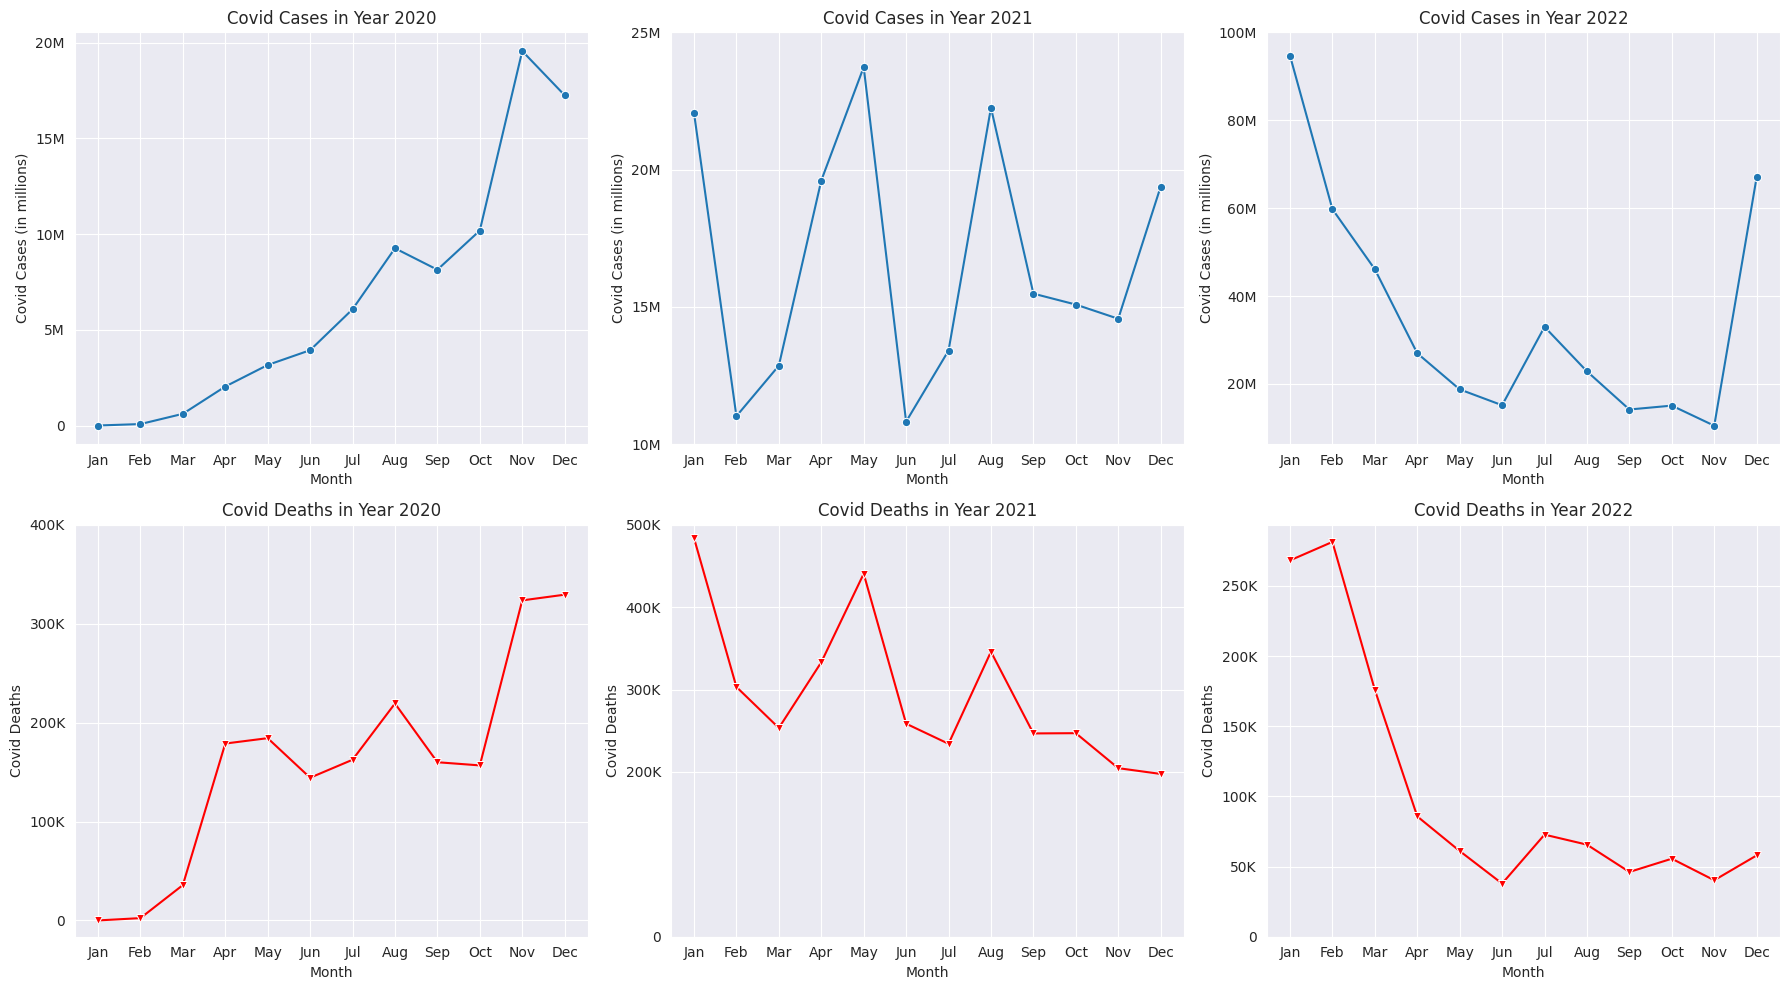

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# First plot: COVID Cases-2020
sns.lineplot(data=month_2020, x='Month', y='New_cases', marker='o', ax=axs[0,0])
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Covid Cases (in millions)')
axs[0,0].set_title('Covid Cases in Year 2020')
axs[0,0].set_xticks(range(1, 13))
axs[0,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0,0].set_yticks([0, 0.5e7, 1.0e7, 1.5e7, 2.0e7])
axs[0,0].set_yticklabels(['0', '5M', '10M', '15M', '20M'])

# Second plot: COVID Deaths-2020
sns.lineplot(data=month_2020, x='Month', y='New_deaths', marker='v', color='red', ax=axs[1,0])
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Covid Deaths')
axs[1,0].set_title('Covid Deaths in Year 2020')
axs[1,0].set_xticks(range(1, 13))
axs[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1,0].set_yticks([0, 100000, 200000, 300000, 400000])
axs[1,0].set_yticklabels(['0', '100K', '200K', '300K', '400K'])

# Third plot: COVID Cases-2021
sns.lineplot(data=month_2021, x='Month', y='New_cases', marker='o', ax=axs[0,1])
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Covid Cases (in millions)')
axs[0,1].set_title('Covid Cases in Year 2021')
axs[0,1].set_xticks(range(1, 13))
axs[0,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0,1].set_yticks([1.0e7, 1.5e7, 2.0e7, 2.5e7])
axs[0,1].set_yticklabels(['10M', '15M', '20M', '25M'])

# Fourth plot: COVID Deaths-2021
sns.lineplot(data=month_2021, x='Month', y='New_deaths', marker='v', color='red', ax=axs[1,1])
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Covid Deaths')
axs[1,1].set_title('Covid Deaths in Year 2021')
axs[1,1].set_xticks(range(1, 13))
axs[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1,1].set_yticks([0, 200000, 300000, 400000, 500000])
axs[1,1].set_yticklabels(['0', '200K', '300K', '400K', '500K'])

# Fifth plot: COVID Cases-2022
sns.lineplot(data=month_2022, x='Month', y='New_cases', marker='o', ax=axs[0,2])
axs[0,2].set_xlabel('Month')
axs[0,2].set_ylabel('Covid Cases (in millions)')
axs[0,2].set_title('Covid Cases in Year 2022')
axs[0,2].set_xticks(range(1, 13))
axs[0,2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0,2].set_yticks([2e7, 4e7, 6e7, 8e7, 1e8])
axs[0,2].set_yticklabels(['20M', '40M', '60M', '80M', '100M'])

# Sixth plot: COVID Deaths-2022
sns.lineplot(data=month_2022, x='Month', y='New_deaths', marker='v', color='red', ax=axs[1,2])
axs[1,2].set_xlabel('Month')
axs[1,2].set_ylabel('Covid Deaths')
axs[1,2].set_title('Covid Deaths in Year 2022')
axs[1,2].set_xticks(range(1, 13))
axs[1,2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1,2].set_yticks([0, 50000, 100000, 150000, 200000, 250000])
axs[1,2].set_yticklabels(['0', '50K', '100K', '150K', '200K', '250K'])

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
df['Year'] = df['Date_reported'].dt.year
df['Month'] = df['Date_reported'].dt.month
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0,2020,1
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0,2020,1
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0,2020,1
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0,2020,2


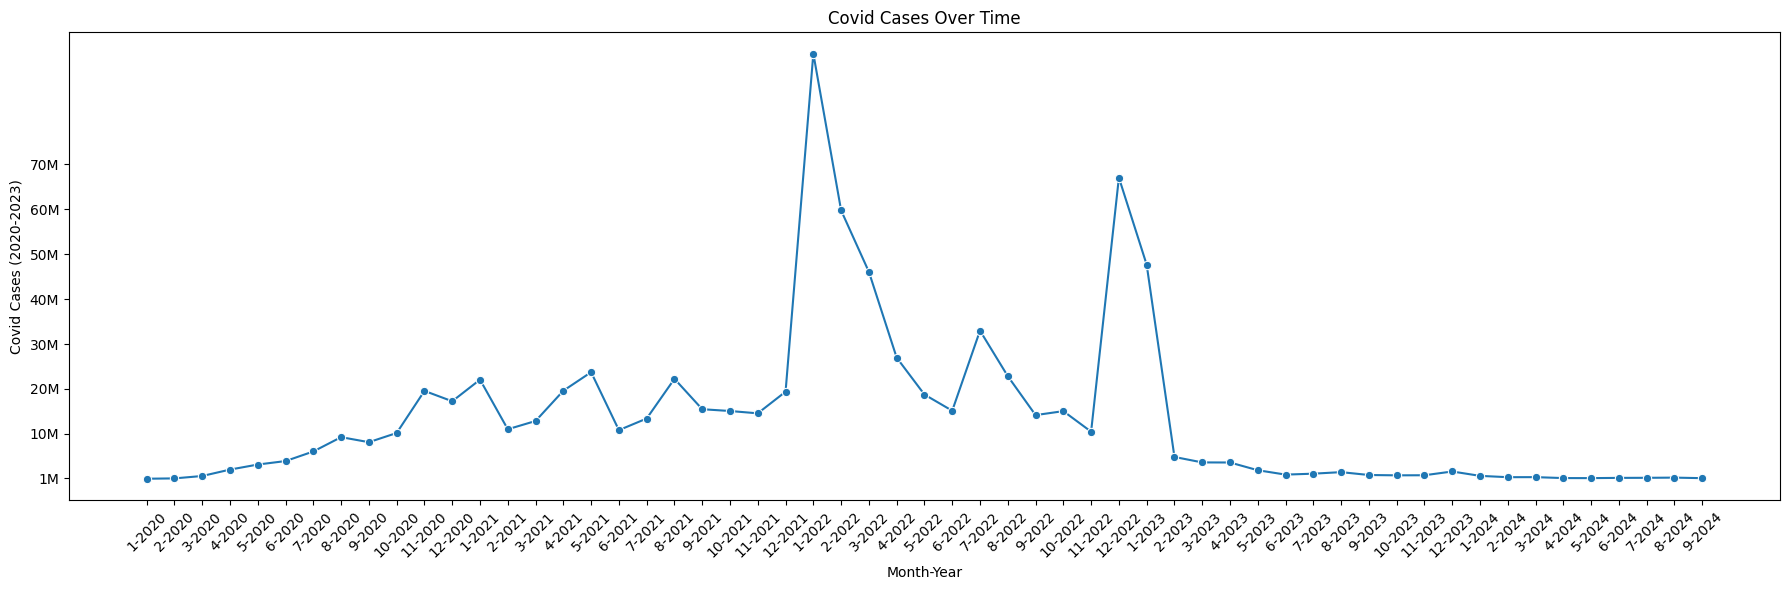

In [19]:
world = df.groupby(['Month', 'Year'])[['New_cases', 'New_deaths']].sum().reset_index()

world['Month-Year'] = world['Month'].astype(str) + '-' + world['Year'].astype(str)
world.sort_values(by=['Year','Month'],inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(data=world, x='Month-Year', y='New_cases', marker='o', ax=ax)

ax.set_xlabel('Month-Year')
ax.set_ylabel('Covid Cases (2020-2023)')
ax.set_title('Covid Cases Over Time')

ax.set_xticks(world['Month-Year'])
ax.set_xticklabels(world['Month-Year'], rotation=45)

ax.set_yticks([100000, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000])
ax.set_yticklabels(['1M', '10M', '20M', '30M', '40M', '50M', '60M', '70M'])


plt.tight_layout()
plt.show()


Covid Deaths Over Time

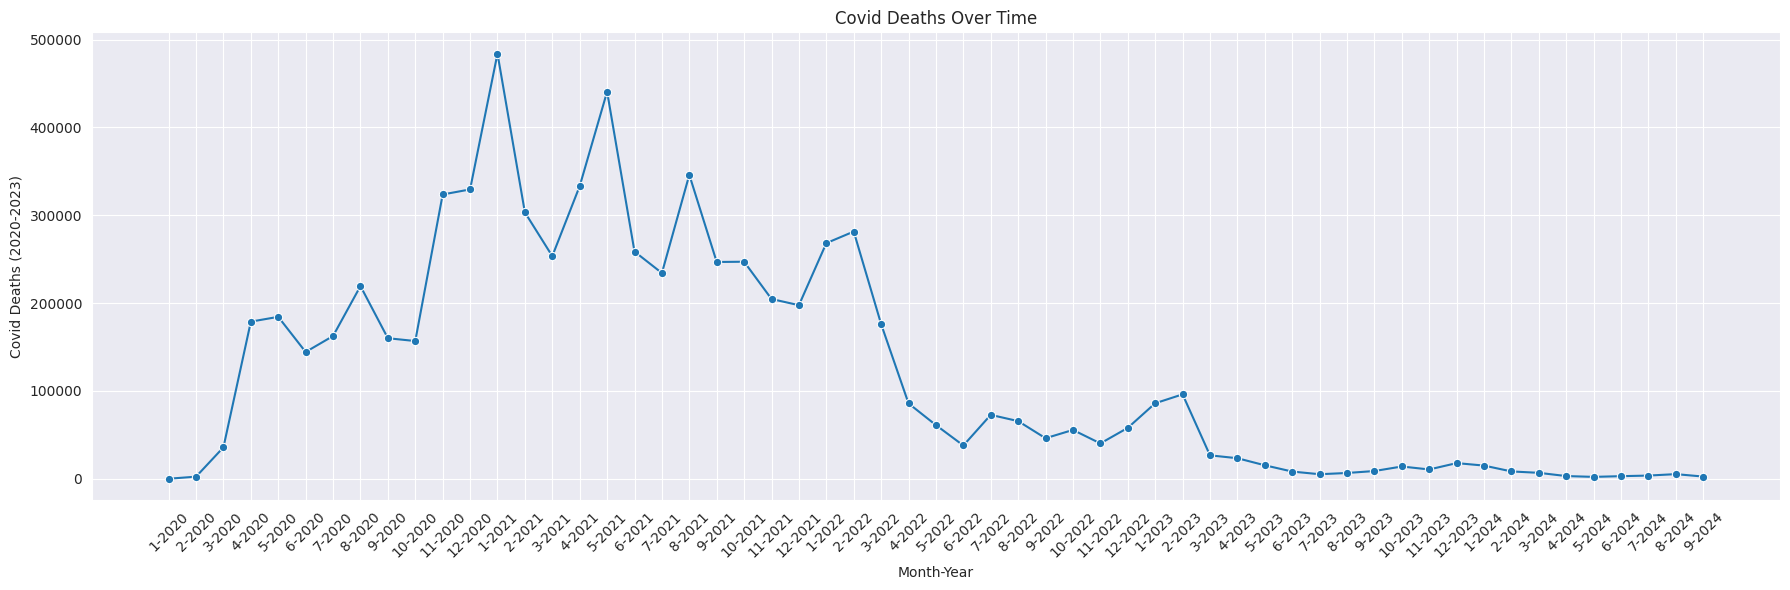

In [43]:
world = df.groupby(['Month', 'Year'])[['New_cases', 'New_deaths']].sum().reset_index()

world['Month-Year'] = world['Month'].astype(str) + '-' + world['Year'].astype(str)
world.sort_values(by=['Year','Month'],inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(data=world, x='Month-Year', y='New_deaths', marker='o', ax=ax)

ax.set_xlabel('Month-Year')
ax.set_ylabel('Covid Deaths (2020-2023)')
ax.set_title('Covid Deaths Over Time')

ax.set_xticks(world['Month-Year'])
ax.set_xticklabels(world['Month-Year'], rotation=45)

plt.tight_layout()
plt.show()


Recovery Rate Across Countries

In [21]:
recovery = df.groupby(['Country','WHO_region'])[['New_cases','New_deaths']].sum().reset_index()
recovery['Recovery_rate'] = ((recovery['New_cases'] - recovery['New_deaths']) / recovery['New_cases']) * 100

Most Recovered and Least Recovered Countries

In [22]:
Top_10_recovered_countries = recovery.sort_values(by='Recovery_rate')['Country'].head(10)
Worst_10_recovered_countries = recovery.sort_values(by='Recovery_rate')['Country'].tail(10)
print(Top_10_recovered_countries,Worst_10_recovered_countries)

218                     Yemen
188                     Sudan
192      Syrian Arab Republic
183                   Somalia
156                      Peru
61                      Egypt
128                    Mexico
26     Bosnia and Herzegovina
115                   Liberia
0                 Afghanistan
Name: Country, dtype: object 138                                         Nauru
91                International commercial vessel
94            International conveyance (Kiribati)
92      International conveyance (American Samoa)
146                                          Niue
96             International conveyance (Vanuatu)
197                                       Tokelau
95     International conveyance (Solomon Islands)
54          Democratic People's Republic of Korea
201                                  Turkmenistan
Name: Country, dtype: object


TOp 10 Countries with Most cases

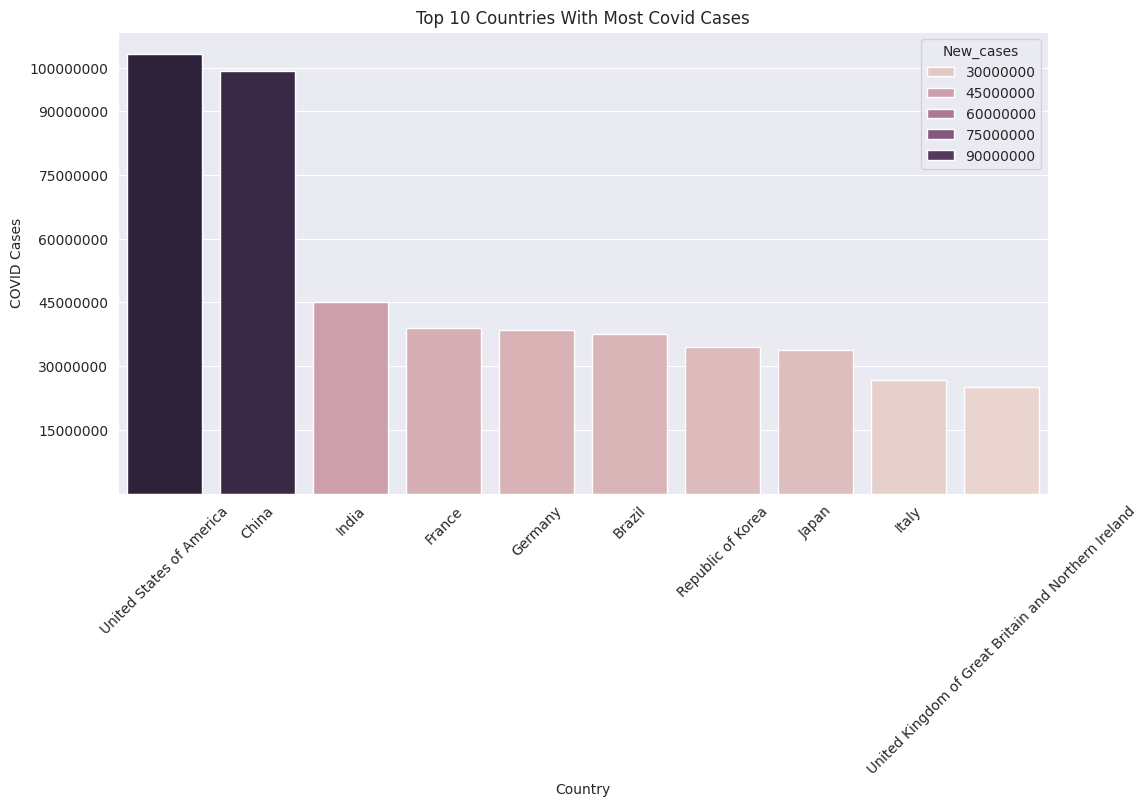

In [45]:
Top_10_cases = recovery.sort_values(by='New_cases',ascending=False)[['Country','New_cases']].head(10)

fig , ax = plt.subplots(figsize=(12,6))
sns.barplot(data=Top_10_cases,x='Country',y='New_cases',hue='New_cases')
ax.set_yticks([15000000,30000000,45000000,60000000,75000000,90000000,100000000])
ax.set_yticklabels(['15000000','30000000','45000000','60000000','75000000','90000000','100000000'])
plt.xticks(rotation=45)
plt.ylabel('COVID Cases')
plt.title('Top 10 Countries With Most Covid Cases')
plt.yticks()
plt.show()

Least Affected Countries

In [24]:
Least_10_cases = recovery.sort_values(by='New_cases')[['Country','New_cases']].head(10)
Least_10_cases

,Country,New_cases
201,Turkmenistan,0
54,Democratic People's Republic of Korea,0
94,International conveyance (Kiribati),2
92,International conveyance (American Samoa),4
95,International conveyance (Solomon Islands),5
96,International conveyance (Vanuatu),12
91,International commercial vessel,29
197,Tokelau,80
93,International conveyance (Diamond Princess),712
146,Niue,1087


High Death Countries

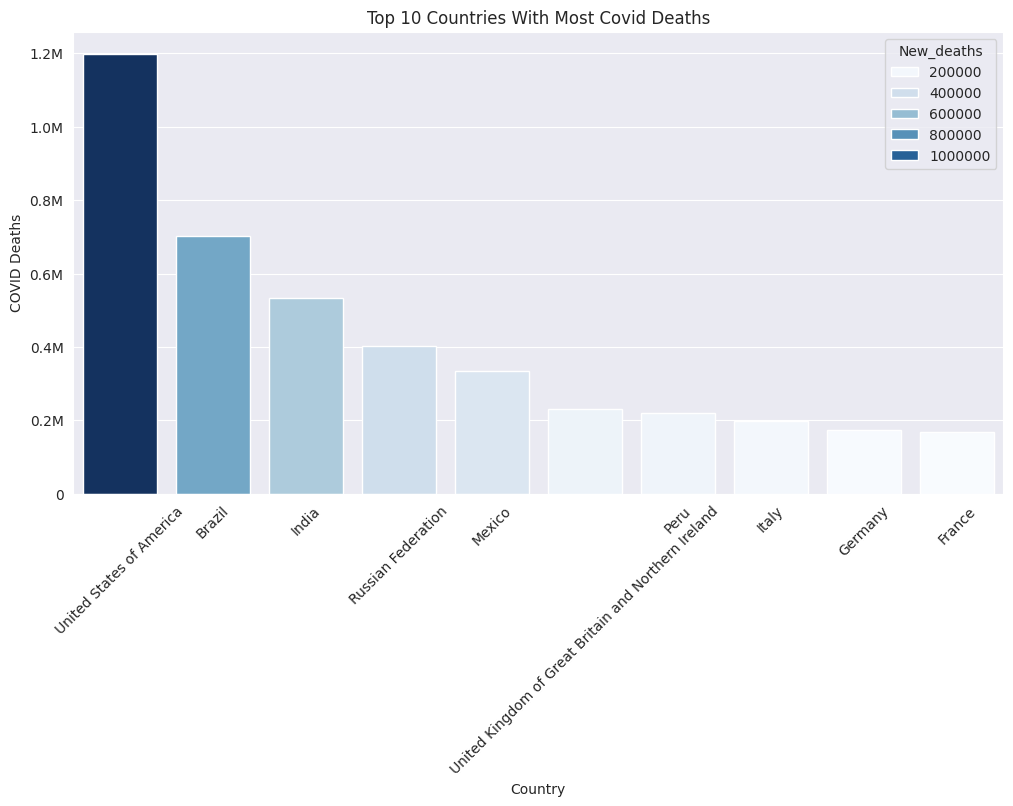

In [48]:
Top_10_deaths= recovery.sort_values(by='New_deaths',ascending=False)[['Country','New_deaths']].head(10)
sns.set_style('darkgrid')
fig , ax = plt.subplots(figsize=(12,6))
palette = sns.color_palette('Blues', as_cmap=True)
sns.barplot(data=Top_10_deaths,x='Country',y='New_deaths',hue='New_deaths',palette = palette)
plt.xticks(rotation=45)
plt.title('Top 10 Countries With Most Covid Deaths')
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6, 1.2e6],['0', '0.2M', '0.4M', '0.6M', '0.8M', '1.0M', '1.2M'])
plt.ylabel('COVID Deaths')
plt.show()

Low Deaths Countries

In [26]:
Least_10_cases = recovery.sort_values(by='New_deaths')[['Country','New_deaths']].head(10)
Least_10_cases

,Country,New_deaths
92,International conveyance (American Samoa),0
94,International conveyance (Kiribati),0
95,International conveyance (Solomon Islands),0
96,International conveyance (Vanuatu),0
146,Niue,0
54,Democratic People's Republic of Korea,0
91,International commercial vessel,0
197,Tokelau,0
201,Turkmenistan,0
138,Nauru,1


Death Rate Across different WHO region

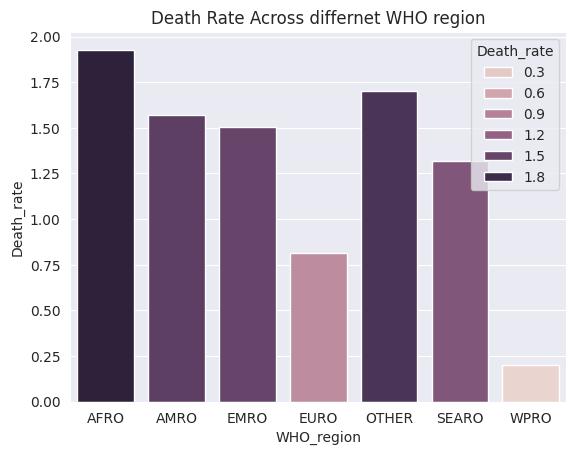

In [49]:
Death = df.groupby('WHO_region')[['New_cases','New_deaths']].sum().reset_index()
Death['Death_rate'] = ((Death['New_deaths']) / Death['New_cases']) * 100

sns.barplot(data=Death,x='WHO_region',y='Death_rate',hue='Death_rate')
plt.title('Death Rate Across differnet WHO region')
plt.show()

Specific Country info

In [28]:
def Country_covid_details(Name):
    df2 = df[df['Country'] == Name]

    covid_years = df2.groupby('Year')[['New_cases', 'New_deaths']].sum().reset_index()
    sns.barplot(data=covid_years, x='Year', y='New_cases',hue='New_cases', palette='viridis')
    plt.title(f'Covid Cases of {Name} (Yearly)')
    plt.ylabel('Covid Cases')
    plt.xlabel('Year')
    plt.show()

    covid_months = df2.groupby(['Month', 'Year'])[['New_cases', 'New_deaths']].sum().reset_index()
    sns.barplot(data=covid_months, x='Month', y='New_cases',hue='Year', palette='viridis')
    plt.title(f'Covid Cases of {Name} (Monthly)')
    plt.ylabel('Covid Cases')
    plt.xlabel('Month')
    plt.show()

    df_summary = df2.groupby('Country')[['New_cases', 'New_deaths']].sum().reset_index()
    return df_summary

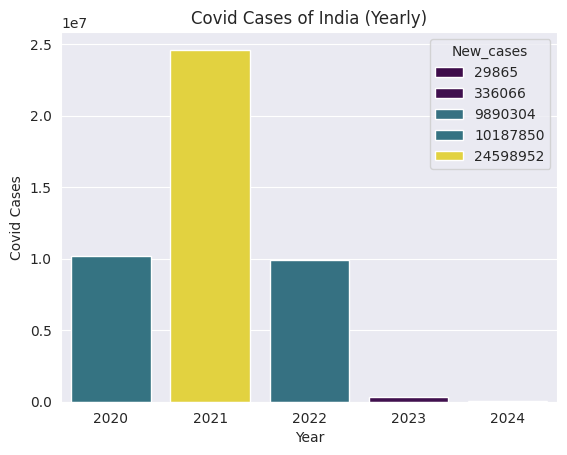

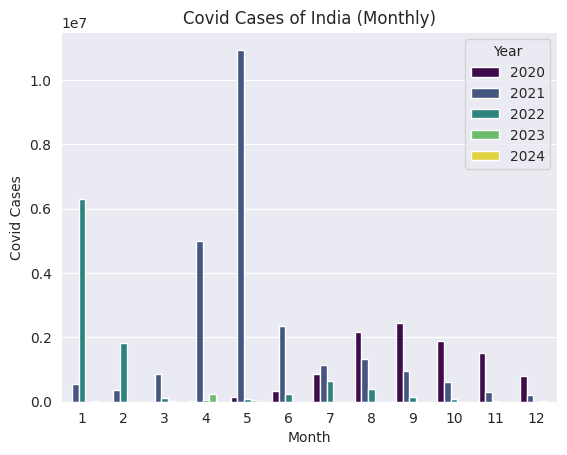

,Country,New_cases,New_deaths
0,India,45043037,533636


In [29]:
India = Country_covid_details('India')
India

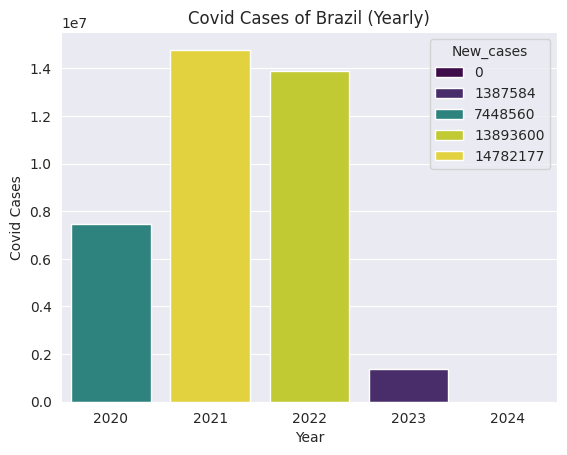

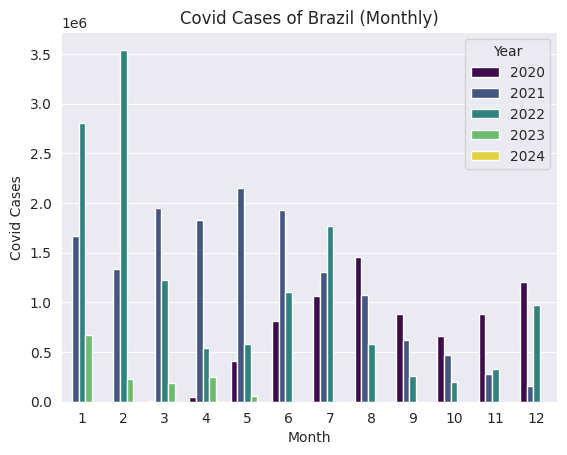

In [30]:
Brazil = Country_covid_details('Brazil')

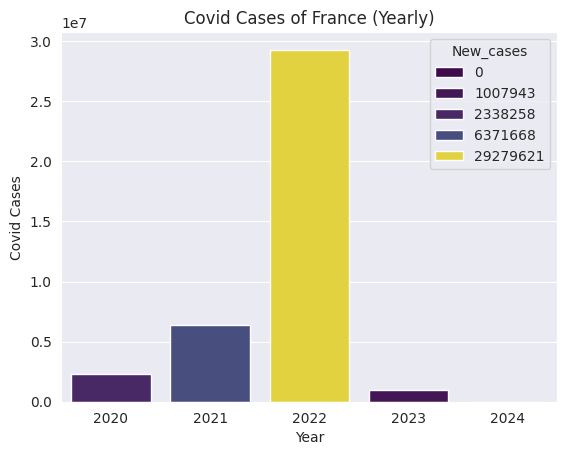

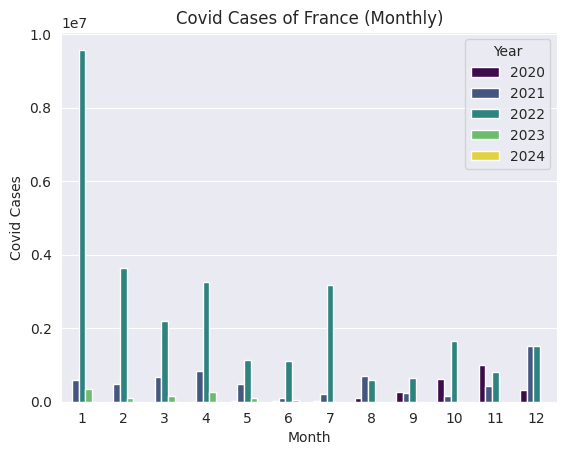

In [31]:
France = Country_covid_details('France')

Deaths Across WHO region

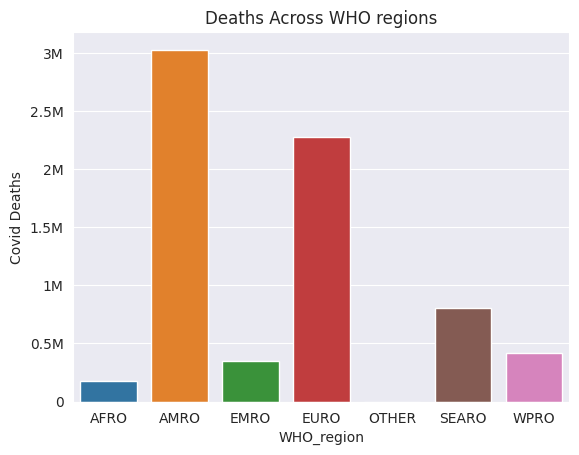

In [53]:
WHO_details = df.groupby('WHO_region')[['New_cases','New_deaths']].sum().reset_index()
sns.barplot(data=WHO_details,x='WHO_region',y='New_deaths',hue='WHO_region')
plt.title('Deaths Across WHO regions')
plt.ylabel('Covid Deaths')
plt.yticks([0.0e6,0.5e6,1.0e6,1.5e6,2.0e6,2.5e6,3.0e6],['0','0.5M','1M','1.5M','2M','2.5M','3M'])
plt.show()